In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fm = tf.keras.datasets.fashion_mnist
(Xtrain, ytrain),(Xtest, ytest) = fm.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
Xtrain.shape
# 6000 image each image 28x28

(60000, 28, 28)

In [ ]:
ytrain.shape

(60000,)

In [ ]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
c_label = ['T-shirt','Trouser','Pullover','Dress',
           'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
c_label[ytrain[19]]

'Coat'

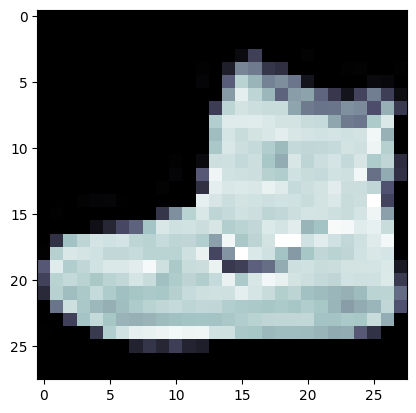

In [ ]:
plt.figure()
plt.imshow(Xtrain[0],cmap=plt.cm.bone)

In [ ]:
c_label[ytrain[0]]

'Ankle boot'

- Scale down the image.

In [ ]:
Xtrain = Xtrain/255.0
Xtest = Xtest/255.0

Create an ANN Model.

In [ ]:
nnModel = tf.keras.Sequential([
    # Input layer
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # Hidden layer 1
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.20),
    # Hidden layer 2
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dropout(0.20),
    # Hidden layer 3
    tf.keras.layers.Dense(10)  # If not specify activation function will default is linear
])

- Compile and fit model.

In [ ]:
nnModel.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
nnModel.fit(Xtrain, ytrain, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5935 - accuracy: 0.7865
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4337 - accuracy: 0.8429
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3973 - accuracy: 0.8555
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3771 - accuracy: 0.8638
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3618 - accuracy: 0.8684
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3492 - accuracy: 0.8736
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3368 - accuracy: 0.8762
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3293 - accuracy: 0.8771
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3229 - accuracy: 0.8805
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.316

- Prediction a value.

In [ ]:
pm = tf.keras.Sequential([nnModel,tf.keras.layers.Softmax()])

In [ ]:
pm

In [ ]:
y_pred = pm.predict(Xtest)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred[0]
# The result is a pdf

array([1.4669449e-06, 3.3600323e-08, 1.3111310e-07, 2.1139591e-07,
       2.6566052e-08, 1.7954309e-03, 5.5373267e-08, 9.0343151e-03,
       1.2899350e-05, 9.8915541e-01], dtype=float32)

In [ ]:
class_label = np.argmax(y_pred[0])

In [ ]:
class_label

9

In [ ]:
c_label[class_label]

'Ankle boot'

In [ ]:
c_label[ytest[0]]

'Ankle boot'

In [ ]:
class_label = np.argmax(y_pred[12])
class_label

5

In [ ]:
c_label[class_label]

'Sandal'

In [ ]:
c_label[ytest[1]]

'Pullover'

In [ ]:
ytest.shape

(10000,)

In [ ]:
i = np.random.randint(low=0,high=9999)
class_label = np.argmax(y_pred[i])

print(f'index: {i}')
print(f'Class: {class_label}')
print(f"y_pred: {c_label[class_label]}")
print(f"y_test: {c_label[ytest[i]]}")

index: 7193
Class: 6
y_pred: Shirt
y_test: Shirt


In [ ]:
i = np.random.randint(low=0,high=9999)
class_label = np.argmax(y_pred[i])

print(f'index: {i}')
print(f'Class: {class_label}')
print(f"y_pred: {c_label[class_label]}")
print(f"y_test: {c_label[ytest[i]]}")

index: 6411
Class: 7
y_pred: Sneaker
y_test: Sneaker
